In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# How many distinctive NBA career journeys are there?
Utilising K-Means, we can cluster complete career journeys for each key stat. We make each key stat a normalised vector.
'and subset on only the complete careers. We will usng data from the 1993-1994 season onwards and careers that reach a certain games played' threshold (in order to give us enough good quality data).

Initially the player-careers were not separating very well. This was down to not appropriately normalising the input data. 'Dipping' in production was not accounted for (typically occurs at the end of a career). This was fixed by not only normalising each stat, but including a rolling subtraction.


In [2]:
#Read in player logs
hist_player_log_full = pd.read_pickle('player_log_complete')
hist_player_log_full['Date'] = hist_player_log_full['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
#eliminate existing playoff games that were pulled
hist_player_log_full = hist_player_log_full[~(hist_player_log_full['SEASON_ID'].isin([42015,42016,42017]))]
hist_player_log_full.to_pickle('player_log_complete2')
#Read in player info
hist_player_info = pd.read_pickle('hist_player_info')

In [3]:
hist_player_log_full=hist_player_log_full.merge(hist_player_info, left_on='Player_ID', right_on='PERSON_ID')
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,VIDEO_AVAILABLE,full_name,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION
0,22000,51,20001188,"APR 18, 2001",VAN @ GSW,W,21,7,12,0.583,...,0,Mahmoud Abdul-Rauf,2001-04-18,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
1,22000,51,20001169,"APR 16, 2001",VAN @ SAC,L,17,5,10,0.500,...,0,Mahmoud Abdul-Rauf,2001-04-16,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
2,22000,51,20001153,"APR 14, 2001",VAN vs. HOU,L,23,12,19,0.632,...,0,Mahmoud Abdul-Rauf,2001-04-14,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
3,22000,51,20001137,"APR 12, 2001",VAN vs. POR,L,16,3,9,0.333,...,0,Mahmoud Abdul-Rauf,2001-04-12,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
4,22000,51,20001124,"APR 10, 2001",VAN vs. MIN,L,9,4,7,0.571,...,0,Mahmoud Abdul-Rauf,2001-04-10,51,1969-03-09T00:00:00,1990,2000,73,162,Guard


In [4]:
hist_player_log_full[hist_player_log_full['full_name']=='LeBron James'].head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,VIDEO_AVAILABLE,full_name,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION
143471,22003,2544,20301179,"APR 14, 2004",CLE @ NYK,W,35,8,17,0.471,...,0,LeBron James,2004-04-14,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143472,22003,2544,20301162,"APR 12, 2004",CLE vs. MIL,W,45,9,20,0.450,...,0,LeBron James,2004-04-12,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143473,22003,2544,20301151,"APR 10, 2004",CLE vs. MIA,W,32,4,11,0.364,...,0,LeBron James,2004-04-10,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143474,22003,2544,20301137,"APR 09, 2004",CLE @ MIA,L,42,6,14,0.429,...,0,LeBron James,2004-04-09,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143475,22003,2544,20301128,"APR 07, 2004",CLE @ MEM,L,36,4,11,0.364,...,0,LeBron James,2004-04-07,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward


In [4]:
print(hist_player_log_full['FROM_YEAR'].min())
print(hist_player_log_full['Date'].apply(lambda x: x.year).min())
print(hist_player_log_full['Date'].apply(lambda x: x.year).max())
print(hist_player_log_full['TO_YEAR'].max())
#Create a 'full career' flag, indicating that we have a player's entire career, start to finish, in the dataset


1976
1994
2019
2018


In [5]:
min_career_year = hist_player_log_full['Date'].apply(lambda x: x.year).min()
max_career_year = hist_player_log_full['Date'].apply(lambda x: x.year).max()-2

In [6]:
hist_player_log_full['full_career_flag'] = np.where((hist_player_log_full['FROM_YEAR']>=min_career_year) & (hist_player_log_full['TO_YEAR']<=max_career_year) , 1, 0)

In [7]:
#Turn name and key into a dictionary
full_careers=dict(zip(hist_player_log_full[hist_player_log_full['full_career_flag']==1]['Player_ID'],
                      hist_player_log_full[hist_player_log_full['full_career_flag']==1]['full_name']))
print('amount of full careers: '+ str(len(full_careers)))

amount of full careers: 1315


In [8]:
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,full_name,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION,full_career_flag
0,22000,51,20001188,"APR 18, 2001",VAN @ GSW,W,21,7,12,0.583,...,Mahmoud Abdul-Rauf,2001-04-18,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
1,22000,51,20001169,"APR 16, 2001",VAN @ SAC,L,17,5,10,0.500,...,Mahmoud Abdul-Rauf,2001-04-16,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
2,22000,51,20001153,"APR 14, 2001",VAN vs. HOU,L,23,12,19,0.632,...,Mahmoud Abdul-Rauf,2001-04-14,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
3,22000,51,20001137,"APR 12, 2001",VAN vs. POR,L,16,3,9,0.333,...,Mahmoud Abdul-Rauf,2001-04-12,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
4,22000,51,20001124,"APR 10, 2001",VAN vs. MIN,L,9,4,7,0.571,...,Mahmoud Abdul-Rauf,2001-04-10,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0


In [9]:
hist_player_log_full.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'full_name', 'Date',
       'PERSON_ID', 'BIRTHDATE', 'FROM_YEAR', 'TO_YEAR', 'HEIGHT', 'WEIGHT',
       'POSITION', 'full_career_flag'],
      dtype='object')

In [10]:
stat_columns = ['FGM','FGA', 'FG3M', 'FTM', 'REB', 'AST', 'STL', 'BLK', 'PTS']

In [11]:
hist_player_log_full.groupby(['full_name', 'SEASON_ID']).agg({k: 'sum' for k in stat_columns}).head()

FGM    FGA  FG3M  FTM    REB    AST   STL   BLK  PTS
full_name  SEASON_ID                                                      
A.C. Green 22000      144  324.0   0.0   79  313.0   39.0  30.0   8.0  367
           21994      311  617.0  43.0  251  669.0  127.0  55.0  31.0  916
           21995      215  444.0  14.0  168  554.0   72.0  45.0  23.0  612
           21996      234  484.0   1.0  128  656.0   69.0  70.0  16.0  597
           21997      242  534.0   0.0  116  668.0  123.0  78.0  27.0  600

In [12]:
hist_player_log_full['date_rank'] = hist_player_log_full.groupby('full_name')['Date'].rank('dense', ascending=True)

'Games played' is heavily skewed to the left, which makes sense. It's very hard to have a long career in the NBA.

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


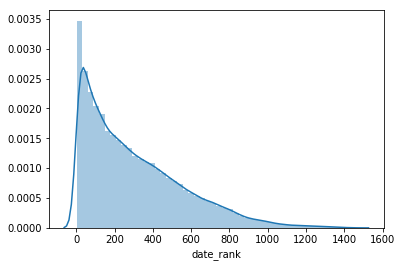

In [13]:
#Distribution of amount of games played in career so far for players with full career data
sns.distplot(hist_player_log_full[hist_player_log_full['full_name'].isin(full_careers.values())]['date_rank'])

In [15]:
#Calculate a relative career elapsed metric (between 0 and 1) depending on how far through their career that are at any point
total_games = hist_player_log_full.groupby(['Player_ID'])['date_rank'].max().reset_index().rename({'date_rank' : 'total_games'}, axis=1)
hist_player_log_full = hist_player_log_full.merge(total_games, on='Player_ID')

In [16]:
hist_player_log_full['career_elapsed_time'] = hist_player_log_full['date_rank']/hist_player_log_full['total_games']

In [17]:
hist_player_log_full[hist_player_log_full['full_name']=='Steve Nash'].head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION,full_career_flag,date_rank,total_games,career_elapsed_time
210207,22003,959,20301186,"APR 14, 2004",DAL @ HOU,W,21,2,4,0.500,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,549.0,1217.0,0.451109
210208,22003,959,20301173,"APR 13, 2004",DAL vs. MEM,W,37,9,14,0.643,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,548.0,1217.0,0.450288
210209,22003,959,20301159,"APR 11, 2004",DAL @ GSW,L,37,5,12,0.417,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,547.0,1217.0,0.449466
210210,22003,959,20301147,"APR 10, 2004",DAL @ SEA,L,28,2,10,0.200,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,546.0,1217.0,0.448644
210211,22003,959,20301134,"APR 08, 2004",DAL vs. UTA,W,29,2,5,0.400,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,545.0,1217.0,0.447823


In [18]:
#Form data into growth vector format (wide)
player_1 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.2].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_first_' + c, axis = 1).reset_index()
player_2 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.4].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_second_' + c, axis = 1).reset_index()
player_3 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.6].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_third_' + c, axis = 1).reset_index()
player_4 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.8].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_fourth_' + c, axis = 1).reset_index()
player_5 = hist_player_log_full.groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_last_' + c, axis = 1).reset_index()
player_stat_df = player_1.merge(player_2, on='Player_ID', how='left').merge(player_3, on='Player_ID', how='left').\
            merge(player_4, on='Player_ID', how='left').merge(player_5, on='Player_ID', how='left')
player_stat_df[player_stat_df['Player_ID']==2544]

,Player_ID,career_first_FGM,career_first_FGA,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,...,career_fourth_PTS,career_last_FGM,career_last_FGA,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS
917,2544,2264,4941.0,298.0,1410,1564.0,1552.0,429.0,175.0,6236,...,25686,11620,23039.0,1684.0,7042,8698.0,8451.0,1909.0,912.0,31966


# Normalise the data

In [19]:
#Min max normalisation on each players growth vector, to squeeze between 0 and 1.
def normfn(x):
    if x.max()==x.min():
        xy = x*0
    else:
        xy = (x-x.min())/(x.max()-x.min())
    return(xy)

In [20]:
for i in player_stat_df['Player_ID'].unique():
    for j in stat_columns:
        wanted_cols = [col for col in player_stat_df.columns if j in col]
        #0,1 normalised the player career vector
        normalised = player_stat_df[player_stat_df['Player_ID']==i][wanted_cols].apply(normfn, axis=1)
        row_index = player_stat_df[player_stat_df['Player_ID']==i].index
        #rolling subtraction to of normalised values column wise and insert
        for k in range(0,len(normalised.columns)):
            player_stat_df.loc[row_index, wanted_cols[k]] = normalised.T.diff().T.fillna(0).iloc[0][k]


In [21]:
player_stat_df[player_stat_df['Player_ID']==959][wanted_cols]

,career_first_PTS,career_second_PTS,career_third_PTS,career_fourth_PTS,career_last_PTS
420,0.0,0.269832,0.263794,0.262904,0.203471


In [22]:
len(hist_player_log_full['Player_ID'].unique())

2206

In [23]:
player_stat_df.filter(regex=("FGM.*")).head(10)

,career_first_FGM,career_second_FGM,career_third_FGM,career_fourth_FGM,career_last_FGM
0,0.0,0.300917,0.300917,0.225688,0.172477
1,0.0,0.372993,0.206799,0.239849,0.180359
2,0.0,0.263699,0.147260,0.246575,0.342466
3,0.0,0.322581,0.309140,0.172043,0.196237
4,0.0,0.284211,0.221053,0.189474,0.305263
5,0.0,0.278977,0.327841,0.281250,0.111932
6,0.0,0.270330,0.236630,0.246154,0.246886
7,0.0,0.293478,0.214427,0.238142,0.253953
8,0.0,0.265286,0.277805,0.249398,0.207511
9,0.0,0.294785,0.301587,0.242630,0.160998


# K-Means clustering check

In [24]:
from sklearn.cluster import KMeans
#subset to just players who played 200 or more games
player_games = total_games[total_games['total_games']>=200]['Player_ID']
df_for_cluster = player_stat_df[(player_stat_df['Player_ID'].isin(full_careers.keys())) & player_stat_df['Player_ID'].isin(player_games)].\
                        drop('Player_ID', axis=1)
rss_dist = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_for_cluster.filter(regex=("FGM.*")))
    rss_dist.append(km.inertia_)


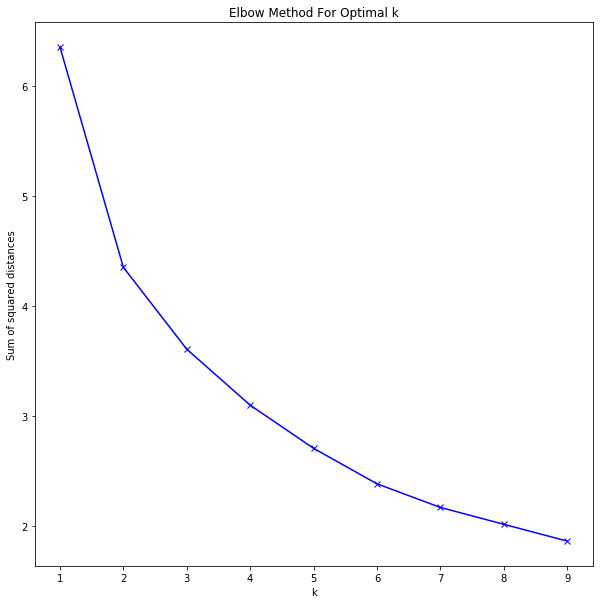

In [25]:
plt.figure(figsize=(10,10))
plt.plot(K, rss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

This now suggests 4 or 5 cluster solution is best

495
495


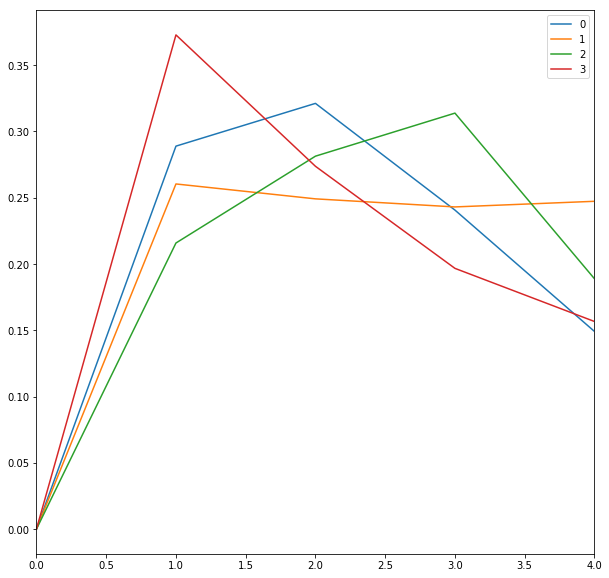

In [26]:
from sklearn.cluster import KMeans
player_games = total_games[total_games['total_games']>=200]['Player_ID']
df_for_cluster = player_stat_df[(player_stat_df['Player_ID'].isin(full_careers.keys())) & player_stat_df['Player_ID'].isin(player_games)].\
                        drop('Player_ID', axis=1)

km = KMeans(4)
km = km.fit(df_for_cluster.filter(regex=("PTS.*")))
pd.DataFrame(km.cluster_centers_).T.plot(figsize=(10,10))
print(len(df_for_cluster))
print(len(km.labels_))

In [27]:
df_with_cluster = player_stat_df[(player_stat_df['Player_ID'].isin(full_careers.keys())) & player_stat_df['Player_ID'].isin(player_games)].\
                        copy()
df_with_cluster['full_name'] = df_with_cluster['Player_ID'].map(full_careers)
df_with_cluster['cluster']= km.labels_
df_with_cluster
df_with_cluster[df_with_cluster['cluster']==3].head()

,Player_ID,career_first_FGM,career_first_FGA,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,...,career_last_FGA,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS,full_name,cluster
97,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.176258,0.171533,0.160305,0.209156,0.233270,0.228571,0.297872,0.153490,Chris Childs,3
146,239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.120835,0.114198,0.076443,0.114943,0.139138,0.134921,0.052632,0.099261,Darrick Martin,3
156,255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.175865,0.425743,0.144115,0.182935,0.151444,0.159140,0.219907,0.168092,Grant Hill,3
205,353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.102683,0.126521,0.098291,0.128723,0.113508,0.121339,0.113636,0.101527,Darrell Armstrong,3
219,376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.201326,0.000000,0.182692,0.181642,0.185629,0.228261,0.201835,0.169702,Eric Montross,3


In [41]:
df_with_cluster.groupby('cluster')['cluster'].count()

cluster
0    176
1    103
2    102
3    114
Name: cluster, dtype: int64

In [37]:
top_players = hist_player_log_full.groupby(['full_name'])['date_rank'].max().sort_values(ascending=False).head(100).reset_index()
df_with_cluster[df_with_cluster['full_name'].isin(top_players['full_name'])].sort_values('cluster').groupby('cluster').head(2)[['full_name', 'cluster']]


,full_name,cluster
609,Paul Pierce,0
535,Tracy McGrady,0
809,Zach Randolph,1
895,Matt Barnes,1
91,Jalen Rose,2
624,Al Harrington,2
527,Tim Duncan,3
156,Grant Hill,3


Looking at the longest careers in each cluster we can see that we've done a pretty good job at grouping the players according to how their careers panned out.
In terms of points 
- Paul Pierce and Tracy McGrady near the middle of their playing careers (cluster 0)
- Zach Randolph and Matt Barnes never really reached a 'peak' and remained relatively consistent in the performance throughout their careers. (cluster 1)
- Jalen Rose and Al Harrington peaked late in their careers. (cluster 2)
- Tim Duncan and Grant Hill peaked in the first portion in their careers (cluster 3).

# Reduce the stat dimensions with PCA

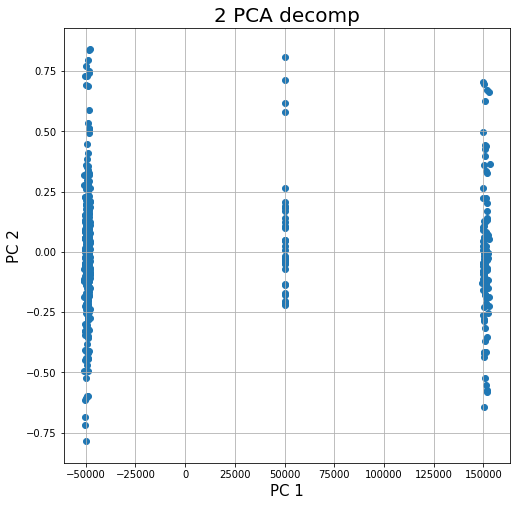

In [42]:
from sklearn.decomposition import PCA
data_for_pca = player_stat_df[(player_stat_df['Player_ID'].isin(full_careers.keys())) & player_stat_df['Player_ID'].isin(player_games)]
pca = PCA(2)
pca.fit(data_for_pca)
data_for_pca=pca.transform(data_for_pca)
principalDf = pd.DataFrame(data = data_for_pca
             , columns = ['principal component 1', 'principal component 2'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 PCA decomp', fontsize = 20)
ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])
ax.grid()